In [1]:
#Import the neccessary library for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter # ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#Read the dataset from the kaggle
df = pd.read_csv("D:\Telechargement\data.csv", index_col = 0)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
print('Rows :', df.shape[0], '\tFeatures :', df.shape[1])
#users like
df['target'].value_counts()

Rows : 2017 	Features : 16


1    1020
0     997
Name: target, dtype: int64

# Categorizing



In [4]:
instru_ind = df[['instrumentalness','speechiness']]
beat_ind = df[['danceability','energy']]
melody_ind = df[['tempo','mode','key','time_signature']]
flow_ind = df[['acousticness','liveness','loudness']]

print(instru_ind.head(2))
print(beat_ind.head(2))
print(melody_ind.head(2))
print(flow_ind.head(2))

   instrumentalness  speechiness
0           0.02190       0.4310
1           0.00611       0.0794
   danceability  energy
0         0.833   0.434
1         0.743   0.359
     tempo  mode  key  time_signature
0  150.062     1    2             4.0
1  160.083     1    1             4.0
   acousticness  liveness  loudness
0        0.0102     0.165    -8.795
1        0.1990     0.137   -10.401


In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
df.describe(include = 'O')

,song_title,artist
count,2017,2017
unique,1956,1343
top,Jack,Drake
freq,3,16


In [7]:
#Check the null value for the string variable
print('song_title:' ,df['song_title'].isnull().sum())
print('artist:' ,df['artist'].isnull().sum())

song_title: 0
artist: 0


In [8]:
# Select duplicate rows except first occurrence based on all columns
print("Duplicate values song title :",df['song_title'].duplicated().sum())
print("Duplicate values artist :",df['artist'].duplicated().sum())

Duplicate values song title : 61
Duplicate values artist : 674


# Analyse the features by visualization
At first, we start to analyse the MusicAttribute group. Which are mode, key and time_signature.
We are not going to analyse the tempo at this moment. Due to tempo is the numeric feature, and other features are ordinal/binary.

In [9]:
print(df[['mode','target']].groupby(['mode']).mean().sort_values(by = 'target', ascending = False))

        target
mode          
0     0.551151
1     0.476923


D:\Utilitaire\WPy64-3770\python-3.7.7.amd64\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


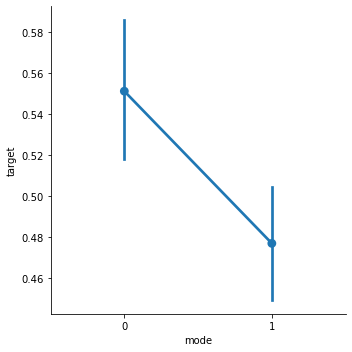

In [10]:
sns.factorplot('mode','target', data = df)
plt.show()

In [11]:
df[['key','target']].groupby('key').mean().sort_values(by = 'target', ascending = False)

,target
key,
2,0.592391
10,0.560284
9,0.544503
11,0.524064
7,0.504717
5,0.500000
6,0.496855
0,0.495370
8,0.492647


# Feature Engineering


In [12]:
print('dimension before droping features:', df.shape)
df = df.drop(['song_title','artist','duration_ms'], axis = 1)
print('dimension after droping features:', df.shape)

dimension before droping features: (2017, 16)
dimension after droping features: (2017, 13)


#### Create the new features by binning method

In [13]:
#1. instrumentalness
df['InstrumentalnessBand'] = pd.cut(df['instrumentalness'],4)
df[['InstrumentalnessBand','target']].groupby('InstrumentalnessBand',as_index = False).mean().sort_values(by = 'InstrumentalnessBand', ascending = True)

,InstrumentalnessBand,target
0,"(-0.000976, 0.244]",0.467635
1,"(0.244, 0.488]",0.724138
2,"(0.488, 0.732]",0.702128
3,"(0.732, 0.976]",0.644809


In [14]:
df['instrumentalness2'] = 0
df.loc[df['instrumentalness'] <= 0.244,'instrumentalness2'] = 0
df.loc[(df['instrumentalness'] > 0.244) & (df['instrumentalness'] <= 0.488), 'instrumentalness2'] = 1
df.loc[(df['instrumentalness'] > 0.488) & (df['instrumentalness'] <= 0.732), 'instrumentalness2'] = 2
df.loc[df['instrumentalness'] > 0.732, 'instrumentalness2'] = 3



In [15]:
#2. speechiness
df['SpeechinessBand'] = pd.cut(df['speechiness'],4)
df[['SpeechinessBand','target']].groupby('SpeechinessBand',as_index = False).mean().sort_values(by = 'SpeechinessBand', ascending = True)

,SpeechinessBand,target
0,"(0.0223, 0.221]",0.481298
1,"(0.221, 0.42]",0.740113
2,"(0.42, 0.618]",0.650000
3,"(0.618, 0.816]",0.500000


In [16]:
df['speechiness2'] = 0
df.loc[df['speechiness'] <= 0.221, 'speechiness2'] = 0
df.loc[(df['speechiness'] > 0.221) & (df['speechiness'] <= 0.42), 'speechiness2'] = 1
df.loc[(df['speechiness'] > 0.42) & (df['speechiness'] <= 0.618), 'speechiness2'] = 2
df.loc[df['speechiness'] > 0.618, 'speechiness2'] = 3



In [17]:
#3. danceability
df['DanceabilityBand'] = pd.cut(df['danceability'],4)
df[['DanceabilityBand','target']].groupby('DanceabilityBand',as_index = False).mean().sort_values(by = 'DanceabilityBand', ascending = True)

,DanceabilityBand,target
0,"(0.121, 0.338]",0.469565
1,"(0.338, 0.553]",0.377820
2,"(0.553, 0.769]",0.506442
3,"(0.769, 0.984]",0.703601


In [18]:
df['danceability2'] = 0
df.loc[df['danceability'] <= 0.338, 'danceability2'] = 0
df.loc[(df['danceability'] > 0.338) & (df['danceability'] <= 0.553), 'danceability2'] = 1
df.loc[(df['danceability'] > 0.553) & (df['danceability'] <= 0.769), 'danceability2'] = 2
df.loc[df['danceability'] > 0.769, 'danceability2'] = 3

In [19]:
#4. energy
df['EnergyBand'] = pd.cut(df['energy'],4)
df[['EnergyBand','target']].groupby('EnergyBand',as_index = False).mean().sort_values(by = 'EnergyBand', ascending = True)

,EnergyBand,target
0,"(0.0138, 0.261]",0.152381
1,"(0.261, 0.506]",0.583333
2,"(0.506, 0.752]",0.555270
3,"(0.752, 0.998]",0.480460


In [20]:
df['energy2'] = 0
df.loc[df['energy'] <= 0.261, 'energy2'] = 0
df.loc[(df['energy'] > 0.261) & (df['energy'] <= 0.506), 'energy2'] = 1
df.loc[(df['energy'] > 0.506) & (df['energy'] <= 0.752), 'energy2'] = 2
df.loc[df['energy'] > 0.752, 'energy2'] = 3

In [21]:
#5. acousticness
df['AcousticnessBand'] = pd.cut(df['acousticness'],4)
df[['AcousticnessBand','target']].groupby('AcousticnessBand',as_index = False).mean().sort_values(by = 'AcousticnessBand', ascending = True)

,AcousticnessBand,target
0,"(-0.000992, 0.249]",0.531187
1,"(0.249, 0.498]",0.496154
2,"(0.498, 0.746]",0.546218
3,"(0.746, 0.995]",0.231293


In [22]:
df['acousticness2'] = 0
df.loc[df['acousticness'] <= 0.249, 'acousticness2'] = 0
df.loc[(df['acousticness'] > 0.249) & (df['acousticness'] <= 0.498), 'acousticness2'] = 1
df.loc[(df['acousticness'] > 0.498) & (df['acousticness'] <= 0.746), 'acousticness2'] = 2
df.loc[df['acousticness'] > 0.746, 'acousticness2'] = 3

In [23]:
#6. liveness
df['LivenessBand'] = pd.cut(df['liveness'],4)
df[['LivenessBand','target']].groupby('LivenessBand', as_index = False).mean().sort_values(by = 'LivenessBand', ascending = True)

,LivenessBand,target
0,"(0.0178, 0.256]",0.499348
1,"(0.256, 0.494]",0.517808
2,"(0.494, 0.731]",0.510870
3,"(0.731, 0.969]",0.692308


In [24]:
df['liveness2'] = 0
df.loc[df['liveness'] <= 0.256,'liveness2'] = 0
df.loc[(df['liveness'] > 0.256) & (df['liveness'] <= 0.494),'liveness2'] = 1
df.loc[(df['liveness'] > 0.494) & (df['liveness'] <= 0.731),'liveness2'] = 2
df.loc[df['liveness'] > 0.731, 'liveness2'] = 3

In [25]:
#7. loudness
df['LoudnessBand'] = pd.cut(df['loudness'], 4)
df[['LoudnessBand','target']].groupby('LoudnessBand').mean()

,target
LoudnessBand,
"(-33.13, -24.9]",0.090909
"(-24.9, -16.702]",0.220000
"(-16.702, -8.504]",0.673660
"(-8.504, -0.307]",0.470858


In [26]:
df['loudness2'] = 0
df.loc[df['loudness'] <= -24.9, 'loudness2'] = 0
df.loc[(df['loudness'] > -24.9) & (df['loudness'] <= -16.702), 'loudness2'] = 1
df.loc[(df['loudness'] > -16.702) & (df['loudness'] <= -8.504), 'loudness2'] = 2
df.loc[df['loudness'] > -8.504, 'loudness2'] = 3

In [27]:
#8. tempo

df['TempoBand'] = pd.cut(df['tempo'],4)
df[['TempoBand','target']].groupby('TempoBand',as_index = False).mean().sort_values(by = 'TempoBand', ascending = True)

,TempoBand,target
0,"(47.688, 90.727]",0.413043
1,"(90.727, 133.595]",0.529218
2,"(133.595, 176.463]",0.485323
3,"(176.463, 219.331]",0.557377


In [28]:
df['tempo2'] = 0
df.loc[df['tempo'] <= 90.727, 'tempo2'] = 0
df.loc[(df['tempo'] > 90.727) & (df['tempo'] <= 133.595), 'tempo2'] = 1
df.loc[(df['tempo'] > 133.595) & (df['tempo'] <= 176.463), 'tempo2'] = 2
df.loc[ df['tempo'] > 176.463, 'tempo2'] = 3

In [29]:
#9. valence
df['valenceband'] = pd.cut(df['valence'], 4)
df[['valenceband','target']].groupby('valenceband').mean().sort_values(by = 'valenceband')

,target
valenceband,
"(0.0338, 0.274]",0.423246
"(0.274, 0.513]",0.490196
"(0.513, 0.753]",0.539405
"(0.753, 0.992]",0.579365


In [30]:
df['valence2'] = 0
df.loc[df['valence'] <= 0.274, 'valence2'] = 0
df.loc[(df['valence'] > 0.274) & (df['valence'] <= 0.513), 'valence2'] = 1
df.loc[(df['valence']> 0.513) & (df['valence'] <= 0.753), 'valence2'] = 2
df.loc[df['valence'] > 0.753, 'valence2'] = 3

In [31]:
df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,AcousticnessBand,acousticness2,LivenessBand,liveness2,LoudnessBand,loudness2,TempoBand,tempo2,valenceband,valence2
0,0.0102,0.833,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,...,"(-0.000992, 0.249]",0,"(0.0178, 0.256]",0,"(-16.702, -8.504]",2,"(133.595, 176.463]",2,"(0.274, 0.513]",1
1,0.1990,0.743,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,...,"(-0.000992, 0.249]",0,"(0.0178, 0.256]",0,"(-16.702, -8.504]",2,"(133.595, 176.463]",2,"(0.513, 0.753]",2
2,0.0344,0.838,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,...,"(-0.000992, 0.249]",0,"(0.0178, 0.256]",0,"(-8.504, -0.307]",3,"(47.688, 90.727]",0,"(0.0338, 0.274]",0
3,0.6040,0.494,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,...,"(0.498, 0.746]",2,"(0.0178, 0.256]",0,"(-16.702, -8.504]",2,"(47.688, 90.727]",0,"(0.0338, 0.274]",0
4,0.1800,0.678,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,...,"(-0.000992, 0.249]",0,"(0.256, 0.494]",1,"(-16.702, -8.504]",2,"(133.595, 176.463]",2,"(0.753, 0.992]",3


In [32]:

df = df.drop(['InstrumentalnessBand','SpeechinessBand','DanceabilityBand','EnergyBand',
                        'AcousticnessBand','LivenessBand','LoudnessBand','TempoBand','valenceband'], axis = 1)

df.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'target', 'instrumentalness2',
       'speechiness2', 'danceability2', 'energy2', 'acousticness2',
       'liveness2', 'loudness2', 'tempo2', 'valence2'],
      dtype='object')

In [33]:
#Drop all the numerical features

df = df.drop(['acousticness','danceability','energy','instrumentalness',
                        'liveness','loudness','speechiness','tempo','valence'],axis = 1)

df.columns

Index(['key', 'mode', 'time_signature', 'target', 'instrumentalness2',
       'speechiness2', 'danceability2', 'energy2', 'acousticness2',
       'liveness2', 'loudness2', 'tempo2', 'valence2'],
      dtype='object')

In [34]:
#Change the time_signature feature from numerical type feature to Int 

df['time_signature'] = df['time_signature'].astype(int)
df.head()

,key,mode,time_signature,target,instrumentalness2,speechiness2,danceability2,energy2,acousticness2,liveness2,loudness2,tempo2,valence2
0,2,1,4,1,0,2,3,1,0,0,2,2,1
1,1,1,4,1,0,0,2,1,0,0,2,2,2
2,2,1,4,1,0,1,3,1,0,0,3,0,0
3,5,1,4,1,2,0,1,1,2,0,2,0,0
4,5,0,4,1,2,0,2,2,0,1,2,2,3


In [35]:
df.describe()

,key,mode,time_signature,target,instrumentalness2,speechiness2,danceability2,energy2,acousticness2,liveness2,loudness2,tempo2,valence2
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,5.342588,0.612295,3.968270,0.505702,0.408528,0.110064,1.798711,2.195340,0.464551,0.310858,2.721368,1.199802,1.430838
std,3.648240,0.487347,0.255853,0.500091,0.937896,0.350429,0.793787,0.857691,0.895789,0.618856,0.532388,0.669814,1.034763
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,1.000000,1.000000
75%,9.000000,1.000000,4.000000,1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,11.000000,1.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [36]:
#drop the features which doesn't have the good result in average mean
df = df.drop(['instrumentalness2','speechiness2','acousticness2','liveness2'], axis = 1)
print('dimension after droping features: ', df.shape)

dimension after droping features:  (2017, 9)


### Create the Dummy Variables from the features, except the target class labels.

In [37]:
df_key = pd.get_dummies(df['key'])
df_time_signature = pd.get_dummies(df['time_signature'])
df_danceability = pd.get_dummies(df['danceability2'])
df_energy = pd.get_dummies(df['energy2'])
df_loudness = pd.get_dummies(df['loudness2'])
df_tempo = pd.get_dummies(df['tempo2'])
df_valence = pd.get_dummies(df['valence2'])

dummy_variables = pd.concat([df_key,df_time_signature,df_danceability,df_energy,df_loudness,df_tempo,df_valence], axis = 1)
df = pd.concat([df,dummy_variables], axis = 1)
print('The dimension of the dataset after create the dummy variables: ', df.shape)

The dimension of the dataset after create the dummy variables:  (2017, 45)


In [38]:
#Replace the numerical features by dummy variables, but the target class labels
df = df.drop(['key','time_signature','danceability2','energy2','loudness2','tempo2','valence2'], axis = 1)
print('dimensionafter droping numerical features: ', df.shape)

dimensionafter droping numerical features:  (2017, 38)


In [39]:
dummy_variables.head()

,0,1,2,3,4,5,6,7,8,9,...,2,3,0,1,2,3,0,1,2,3
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


# Model, predict & evaluation

In [40]:

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [41]:
#1. Create the X_train without the target class label & Y_train (target)
X_train = df.drop('target', axis = 1)
Y_train = df['target']

#2. Split the X_Train & Y_train into training set & testing set by train_test_split function
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.1,random_state = 0)

In [42]:
print('the dimension of the x_train: ', x_train.shape)
print('the dimension of the x_test: ', x_test.shape)

the dimension of the x_train:  (1815, 37)
the dimension of the x_test:  (202, 37)


In [43]:
#3. Fit the model into the training set

# Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)
log_y_pred = log.predict(x_test)
log_result_train = round(log.score(x_train,y_train)*100,2)

# Linear Regression
NB = LinearRegression()
NB.fit(x_train,y_train)
NB_y_pred = NB.predict(x_test)
NB_result_train = round(NB.score(x_train,y_train)*100,2)

# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
DT_result_train = round(DT.score(x_train,y_train)*100, 2)

# K-Nearest Neighbors (K-NN)
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_y_pred = KNN.predict(x_test)
KNN_result_train = round(KNN.score(x_train,y_train)*100,2)

print('1. Logistic Regression: ', log_result_train)
print('2. Gaussian Naive Bayes: ', NB_result_train)
print('3. Decision Tree Classifier: ', DT_result_train)
print('4. K-NN: ', KNN_result_train)

1. Logistic Regression:  65.73
2. Gaussian Naive Bayes:  10.52
3. Decision Tree Classifier:  87.93
4. K-NN:  73.72


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = KNN.predict(x_test)
mse = mean_squared_error(y_test, y_pred)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 0.3910891089108911, rmse = 0.6253711769108735 
mae = 0.3910891089108911 r2 = -0.5950024987506246


In [45]:
#4. Fit the model into the testing dataset


#i. Logistic Regression
log_result_test = round(log.score(x_test,y_test)*100,2)

#ii. Gaussian Naive Bayes
NB_result_test = round(NB.score(x_test,y_test)*100,2)

#iii. Decision Tree
DT_result_test = round(DT.score(x_test,y_test)*100,2)

#iv. K-Nearest Neighbors
KNN_result_test = round(KNN.score(x_test,y_test)*100,2)

print('1. Logistic Regression: {}'.format(log_result_test))
print('2. Gaussian Naive Bayes: {}'.format(NB_result_test))
print('3. Decision Tree: {}'.format(DT_result_test))
print('4. K-NN: {}'.format(KNN_result_test))

1. Logistic Regression: 58.91
2. Gaussian Naive Bayes: 4.27
3. Decision Tree: 57.92
4. K-NN: 60.89


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

In [46]:
#5. Apply K-fold Cross Validation method into the model (testing data)

#1. Logistic Regression
Kfold = KFold(n_splits = 10)
logregScore = cross_val_score(log,x_test,y_test, cv = Kfold)
avglogregScore = np.mean(logregScore)

#2. Gaussien Naive Bayes
NBScore = cross_val_score(NB,x_test,y_test, cv = Kfold)
avgNBScore = np.mean(NBScore)

#3. Decision Tree Classifier
DTScore = cross_val_score(DT, x_test,y_test, cv =Kfold)
avgDTScore = np.mean(DTScore)

#4. K-NN
KNNScore = cross_val_score(KNN, x_test,y_test, cv = Kfold)
avgKNNScore = np.mean(KNNScore)
#for i in range(len(logregScore)): 
  #  print(i+1, 'Logistic Regression:',logregScore[i])
    
print('1. Logistic Regression: ', round(avglogregScore*100,2))
print('2. Gaussian Naive Bayes:  ', round(avgNBScore*100,2))
print('3. Decision Tree Classifier: ', round(avgDTScore*100,2))
print('4. K-NN: ', round(avgKNNScore*100,2))


1. Logistic Regression:  65.86
2. Gaussian Naive Bayes:   0.01
3. Decision Tree Classifier:  56.83
4. K-NN:  65.79


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = KNN.predict(x_test)
mse = mean_squared_error(y_test, y_pred)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 0.3910891089108911, rmse = 0.6253711769108735 
mae = 0.3910891089108911 r2 = -0.5950024987506246


In [48]:
#print(reg.coef_)
index_to_predict = 0
print("Value to predict is ",y[index_to_predict])

print(reg.predict(np.array(x.iloc[index_to_predict]).reshape(1,-1))[0])

NameError: name 'y' is not defined